## Practice - Pandas, Matplotlib, and Seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [3]:
data = pd.read_csv("/Users/xsp/Desktop/Datasets/Countries.csv")
data

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251


In [4]:
nrows, ncolumns = data.shape
print("This dataset has", nrows, "rows and", ncolumns, "columns")

This dataset has 210 rows and 6 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    210 non-null    object 
 1   continent                   210 non-null    object 
 2   population                  210 non-null    float64
 3   life_expectancy             207 non-null    float64
 4   hospital_beds_per_thousand  164 non-null    float64
 5   gdp_per_capita              183 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.0+ KB


In [6]:
data['continent'].value_counts()

Africa           55
Europe           51
Asia             47
North America    36
South America    13
Oceania           8
Name: continent, dtype: int64

In [7]:
print("Number of Continents:", data['continent'].nunique())
print("Number of Countries:", data['location'].nunique())

Number of Continents: 6
Number of Countries: 210


In [8]:
data.describe()

,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
count,2.100000e+02,207.000000,164.000000,183.000000
mean,3.694276e+07,73.529855,3.012671,19485.912399
std,1.425092e+08,7.560056,2.464917,19820.802488
min,8.090000e+02,53.280000,0.100000,661.240000
25%,1.031042e+06,69.260000,1.300000,4504.151000
50%,6.909866e+06,75.090000,2.358500,13111.214000
75%,2.615868e+07,78.940000,3.895750,28349.983500
max,1.439324e+09,86.750000,13.800000,116935.600000


#### Quick notes:
* Average population across 210 countries around the world is `30` million.
* Around 50 percent of the countries have more than `6.9` million population.
* Largest country per population has `1.4` billion people, while the smallest has `800` people.
* Global average life expectancy is `73`.
* Out of 164 countries, `80` have more than 2 hospital beds per thousand (population). Around `41` countries have less than 1.3 hospital beds per thousand. 
* Global average GDP per capita is `19,486 USD` with maximum of 116,935 USD and minimum of 661 USD.

In [9]:
data.isnull().sum()

location                       0
continent                      0
population                     0
life_expectancy                3
hospital_beds_per_thousand    46
gdp_per_capita                27
dtype: int64

In [10]:
data[data['hospital_beds_per_thousand'].isna()]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495
5,Anguilla,North America,15002.0,81.88,NaN,NaN
9,Aruba,North America,106766.0,76.29,NaN,35973.781
21,Bermuda,North America,62273.0,82.59,NaN,50669.315
24,Bonaire Sint Eustatius and Saba,North America,26221.0,77.79,NaN,NaN
28,British Virgin Islands,North America,30237.0,79.07,NaN,NaN
37,Cayman Islands,North America,65720.0,83.92,NaN,49903.029
39,Chad,Africa,16425859.0,54.24,NaN,1768.153
44,Congo,Africa,5518092.0,64.57,NaN,4881.406


In [11]:
data[data['gdp_per_capita'].isna()]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
3,Andorra,Europe,77265.0,83.73,NaN,NaN
5,Anguilla,North America,15002.0,81.88,NaN,NaN
24,Bonaire Sint Eustatius and Saba,North America,26221.0,77.79,NaN,NaN
28,British Virgin Islands,North America,30237.0,79.07,NaN,NaN
48,Cuba,North America,11326616.0,78.80,5.200,NaN
49,Curacao,North America,164100.0,78.88,NaN,NaN
64,Faeroe Islands,Europe,48865.0,80.67,NaN,NaN
65,Falkland Islands,South America,3483.0,81.44,NaN,NaN
69,French Polynesia,Oceania,280904.0,77.66,NaN,NaN
75,Gibraltar,Europe,33691.0,79.93,NaN,NaN


In [12]:
data['gdp'] = data['population'] * data['gdp_per_capita']

In [13]:
data.rename(columns={'location':'countries'}, inplace=True)
data

,countries,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,7.022622e+10
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,3.396791e+10
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,6.101364e+11
3,Andorra,Europe,77265.0,83.73,NaN,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,1.912651e+11
...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,6.007624e+11
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,4.411699e+10
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,6.782303e+10


In [14]:
# GDP per capita above $12,055
rich_countries = data[data['gdp_per_capita'] > 12055]

# GDP per capita between $12,055 and $1036
middle_countries = data[data['gdp_per_capita'].between(1036, 12055)]

# GDP per capita less than $1036
poor_countries = data[data['gdp_per_capita'] < 1036]

In [15]:
rich_countries['continent'].value_counts()

Europe           37
Asia             22
North America    18
Africa            8
South America     8
Oceania           2
Name: continent, dtype: int64

In [16]:
middle_countries['continent'].value_counts()

Africa           40
Asia             23
North America     9
Europe            5
South America     4
Oceania           2
Name: continent, dtype: int64

In [17]:
poor_countries['continent'].value_counts()

Africa    5
Name: continent, dtype: int64

### Notes:
* *High-income* category has countries from all continents but most are from Europe, Asia, and North America.
* Roughly half of Asians countries and most of Afrian countries are in the *middle-income* category.
* *Low-income* category comprises of 5 African countries.

In [18]:
topten_gdp = data.sort_values(by='gdp', ascending=False).head(10)
topten_gdp[['countries','gdp']]

,countries,gdp
41,China,2.203419e+13
199,United States,1.794877e+13
90,India,8.868838e+12
99,Japan,4.932863e+12
73,Germany,3.789485e+12
157,Russia,3.614206e+12
91,Indonesia,3.060386e+12
27,Brazil,2.997821e+12
198,United Kingdom,2.698689e+12
68,France,2.519928e+12


In [19]:
topten_gdp_per_cap = data.sort_values(by='gdp_per_capita', ascending=False).head(10)
topten_gdp_per_cap[['countries','gdp_per_capita']]

,countries,gdp_per_capita
155,Qatar,116935.600
115,Luxembourg,94277.965
169,Singapore,85535.383
29,Brunei,71809.251
94,Ireland,67335.293
197,United Arab Emirates,67293.483
105,Kuwait,65530.537
143,Norway,64800.057
183,Switzerland,57410.166
162,San Marino,56861.470


In [20]:
topten_pop = data.sort_values(by='population', ascending=False).head(10)
topten_pop[['countries','population']]

,countries,population
41,China,1.439324e+09
90,India,1.380004e+09
199,United States,3.310026e+08
91,Indonesia,2.735236e+08
145,Pakistan,2.208923e+08
27,Brazil,2.125594e+08
141,Nigeria,2.061396e+08
15,Bangladesh,1.646894e+08
157,Russia,1.459345e+08
125,Mexico,1.289328e+08


In [21]:
topten_life = data.sort_values(by='life_expectancy', ascending=False).head(10)
topten_life[['countries','life_expectancy']]

,countries,life_expectancy
127,Monaco,86.75
162,San Marino,84.97
87,Hong Kong,84.86
99,Japan,84.63
37,Cayman Islands,83.92
183,Switzerland,83.78
3,Andorra,83.73
169,Singapore,83.62
177,Spain,83.56
97,Italy,83.51


In [22]:
topten_hbeds = data.sort_values(by='hospital_beds_per_thousand', ascending=False).head(10)
topten_hbeds[['countries','hospital_beds_per_thousand']]

,countries,hospital_beds_per_thousand
127,Monaco,13.800
99,Japan,13.050
175,South Korea,12.270
17,Belarus,11.000
196,Ukraine,8.800
157,Russia,8.050
73,Germany,8.000
30,Bulgaria,7.454
11,Austria,7.370
88,Hungary,7.020


In [23]:
global_avg = data.groupby('continent').mean().sort_values(by='gdp', ascending=False)
global_avg

/var/folders/l8/v0fqd1t55c77wbw2p6v4rn5r0000gn/T/ipykernel_60593/876764078.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_avg = data.groupby('continent').mean().sort_values(by='gdp', ascending=False)


,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
continent,,,,,
Asia,9.802953e+07,74.596809,2.905349,22938.020111,1.261375e+12
North America,1.642340e+07,76.683333,2.316522,21655.243704,8.393693e+11
Europe,1.467659e+07,79.779167,5.164605,33360.618357,5.799726e+11
South America,3.311239e+07,75.579231,2.068333,13840.785250,5.215167e+11
Oceania,5.119790e+06,76.211250,2.916667,23315.180500,3.386398e+11
Africa,2.435316e+07,64.225636,1.505500,5443.837132,1.160227e+11


In [24]:
data.corr()

/var/folders/l8/v0fqd1t55c77wbw2p6v4rn5r0000gn/T/ipykernel_60593/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,gdp
population,1.000000,-0.027369,-0.038329,-0.058792,0.806715
life_expectancy,-0.027369,1.000000,0.471940,0.689805,0.148086
hospital_beds_per_thousand,-0.038329,0.471940,1.000000,0.296995,0.113679
gdp_per_capita,-0.058792,0.689805,0.296995,1.000000,0.127466
gdp,0.806715,0.148086,0.113679,0.127466,1.000000


### Notes:
* There is a high correlation between population and gdp (0.81) as well as life expectancy and gdp_per_capita (0.69).
* There is a level of correlation between life_expectancy and number of hospital beds (0.47).
* There is little to no relationships for the rest of variable sets.


In [56]:
%matplotlib inline
plt.style.use('ggplot')
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Top 10 Countries by Hospital Beds (per thousand)')

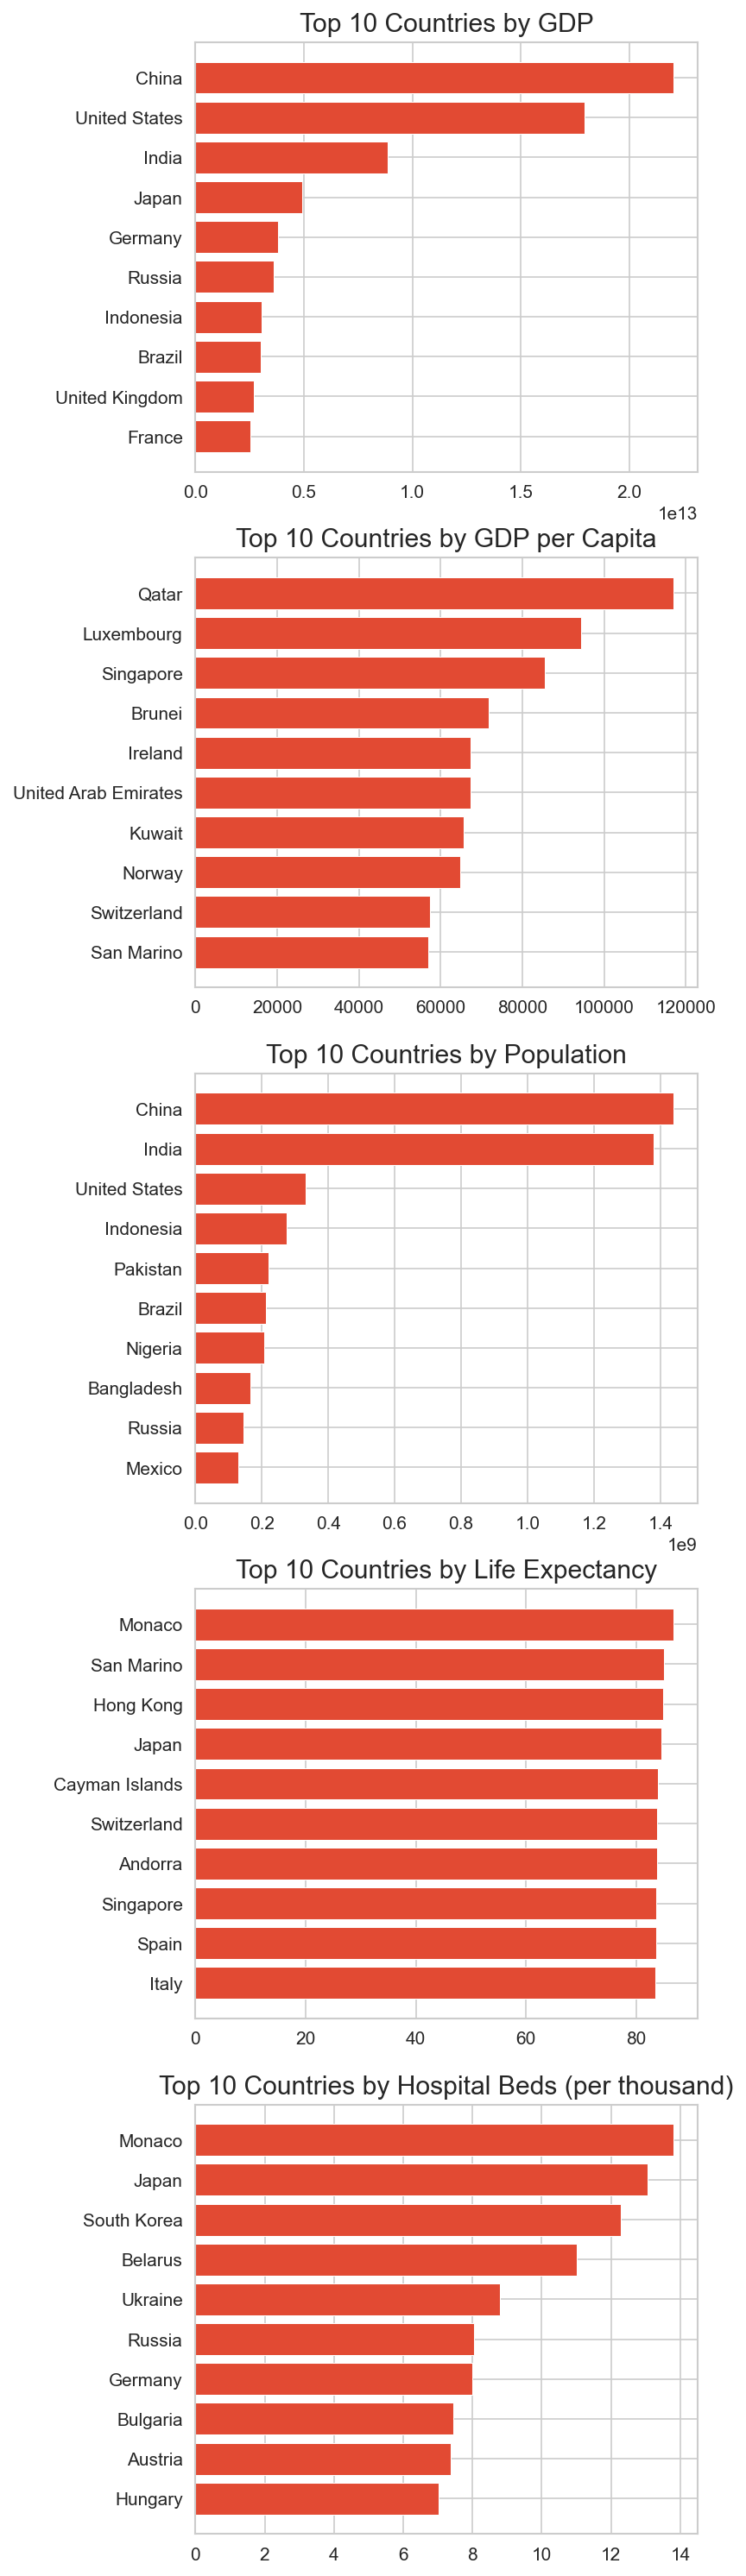

In [61]:
fig, axs = plt.subplots(5, figsize=(5,25), dpi=150)
topten_gdp = topten_gdp.sort_values('gdp')
axs[0].barh(topten_gdp['countries'],topten_gdp['gdp'])
axs[0].set_title("Top 10 Countries by GDP")

topten_gdp_per_cap = topten_gdp_per_cap.sort_values('gdp_per_capita')
axs[1].barh(topten_gdp_per_cap['countries'], topten_gdp_per_cap['gdp_per_capita'])
axs[1].set_title("Top 10 Countries by GDP per Capita")

topten_pop = topten_pop.sort_values('population')
axs[2].barh(topten_pop['countries'], topten_pop['population'])
axs[2].set_title("Top 10 Countries by Population")

topten_life = topten_life.sort_values('life_expectancy')
axs[3].barh(topten_life['countries'], topten_life['life_expectancy'])
axs[3].set_title("Top 10 Countries by Life Expectancy")

topten_hbeds = topten_hbeds.sort_values('hospital_beds_per_thousand')
axs[4].barh(topten_hbeds['countries'], topten_hbeds['hospital_beds_per_thousand'])
axs[4].set_title("Top 10 Countries by Hospital Beds (per thousand)")

[]

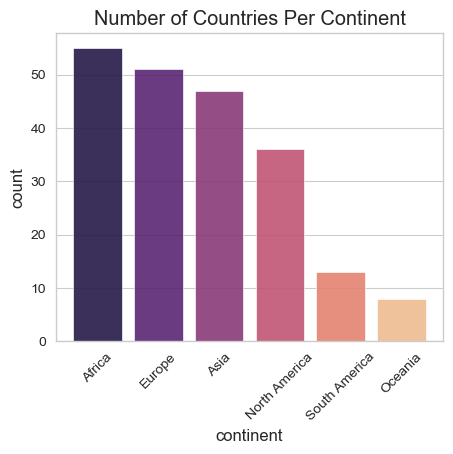

In [52]:
plt.figure(figsize=(5,4))
sns.countplot(x=data['continent'], palette='magma', alpha=0.9, order=['Africa',
         'Europe','Asia','North America','South America','Oceania'])
plt.title("Number of Countries Per Continent")
plt.xticks(rotation=45)
plt.plot()

[]

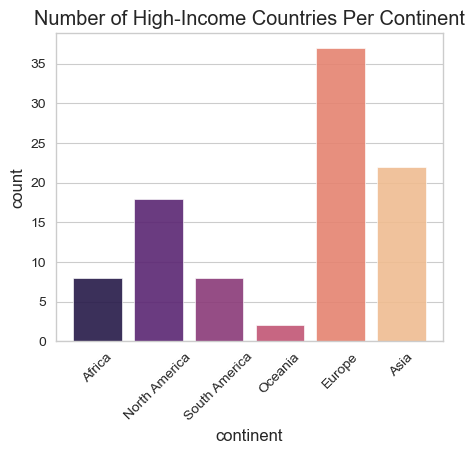

In [53]:
plt.figure(figsize=(5,4))
sns.countplot(x=rich_countries['continent'], palette='magma', alpha=0.9)
plt.title("Number of High-Income Countries Per Continent")
plt.xticks(rotation=45)
plt.plot()

[]

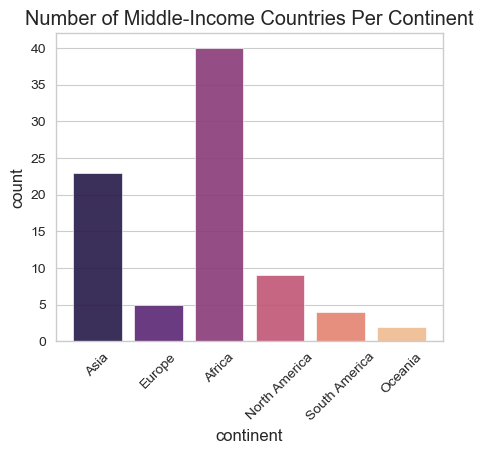

In [54]:
plt.figure(figsize=(5,4))
sns.countplot(x=middle_countries['continent'], palette='magma', alpha=0.9)
plt.title("Number of Middle-Income Countries Per Continent")
plt.xticks(rotation=45)
plt.plot()

[]

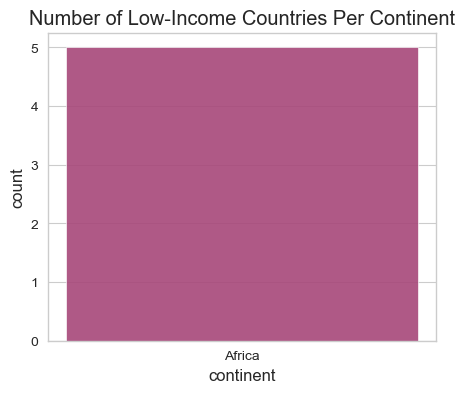

In [55]:
plt.figure(figsize=(5,4))
sns.countplot(x=poor_countries['continent'], palette='magma', alpha=0.9)
plt.title("Number of Low-Income Countries Per Continent")
plt.plot()

Text(0.5, 1.0, 'Relationship Between GDP and Population')

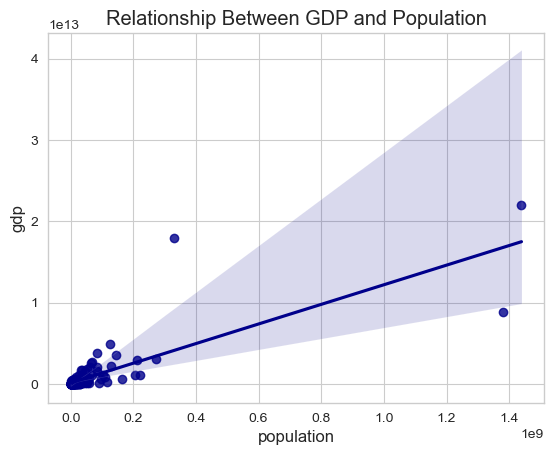

In [31]:
sns.regplot(data=data, y='gdp', x='population', color='darkblue')
plt.title("Relationship Between GDP and Population")

Text(0.5, 1.0, 'Relationship Between GDP per Capita and Life Expectancy')

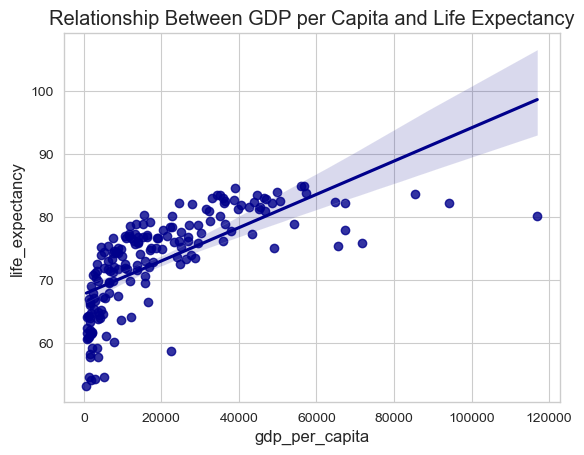

In [32]:
sns.regplot(data=data, x='gdp_per_capita', y='life_expectancy', color='darkblue')
plt.title("Relationship Between GDP per Capita and Life Expectancy")

Text(0.5, 1.0, 'Relationship Between Hospital Beds (per 1000) and Life Expectancy')

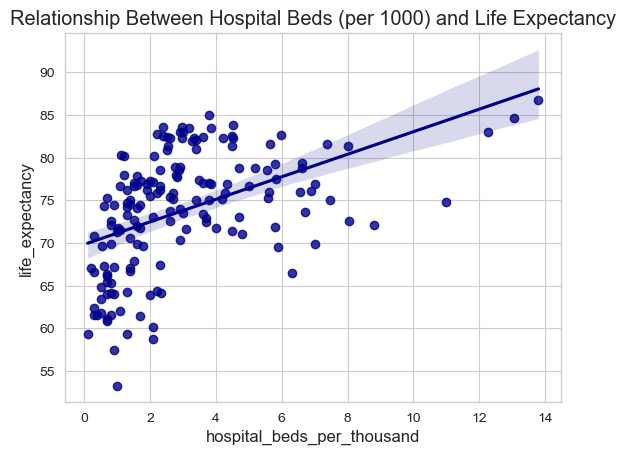

In [33]:
sns.regplot(data=data, x='hospital_beds_per_thousand', y='life_expectancy', color='darkblue')
plt.title("Relationship Between Hospital Beds (per 1000) and Life Expectancy")